In [1]:
import pandas as pd
import numpy as np
import sys
import os
from skimage import io
import matplotlib.pyplot as plt

In [6]:
PATH = os.path.dirname(os.path.realpath("Results/Results_750ng_2908.csv"))
print('PATH', str(PATH))


PATH /Users/deborahma/Downloads/Results


In [16]:
os.chdir(PATH)
files = filter(os.path.isfile, os.listdir(PATH))

data = []

def first_char(x):
    return(x[:14])

files = sorted(files, key = first_char)

for i, filename in enumerate(files):
    print(i)
    print(filename)
    #if(filename=='.DS_Store'): continue
        
    if (filename.endswith('.csv')):
        data.append(pd.read_csv(filename, sep=';'))
        data[i-1] = data[i-1].rename(columns={'Unnamed: 0':filename})


        try:
            print('hei')
        except:
            continue
    else:
        continue


0
.DS_Store
1
Results_100pg_ROI_1-9-90pix_20210828.csv
hei
2
Results_100pg_ROI_2-9-90pix_20210828.csv
hei
3
Results_10ng_ROI_2_20210826.csv
hei
4
Results_10ng_ROI_1_20210826.csv
hei
5
Results_1ng_ROI_2_20210830.csv
hei
6
Results_1ng_ROI_1_20210830.csv
hei
7
Results_200pg_ROI_1_20210828.csv
hei
8
Results_200pg_ROI_2_20210828.csv
hei
9
Results_500pg_ROI_2_20210827.csv
hei
10
Results_500pg_ROI_1_20210827.csv
hei
11
Results_50pg_ROI_1-9-90pix_20210828.csv
hei
12
Results_50pg_ROI_2-9-90pix_20210828.csv
hei
13
Results_5ng_ROI_2_20210827.csv
hei
14
Results_5ng_ROI_1_20210827.csv
hei
15
Results_750ng_20210830.csv
hei
16
Results_blank2_ROI_2_2808.csv
hei
17
Results_blank2_ROI_1_2808.csv
hei


In [17]:
#Separate data
d100pg_R1 = data[0]  #'Results_100pg_ROI_1-9-90pix_20210828.csv'
d100pg_R2 = data[1]  #'Results_100pg_ROI_2-9-90pix_20210828.csv'
d10ng_R1 = data[2]   #'Results_10ng_ROI_1_2608.csv'
d10ng_R2 = data[3]   #'Results_10ng_ROI_2_26_08.csv'
d1ng_R1 = data[4]    #'Results_1ng_ROI_1_20210827.csv'
d1ng_R2 = data[5]    #'Results_1ng_ROI_1_20210829.csv'
d200pg_R1 = data[6]  #'Results_200pg_ROI_1_20210828.csv'
d200pg_R2 = data[7]  #'Results_200pg_ROI_2_20210828.csv'
d500pg_R1 = data[8] #'Results_500pg_ROI_1_20210827.csv'
d500pg_R2 = data[9] #'Results_500pg_ROI_2_20210827.csv'
d50pg_R1 = data[10]  #'Results_50pg_ROI_1-9-90pix_20210828.csv'
d50pg_R2 = data[11]  #'Results_50pg_ROI_2-9-90pix_20210828.csv'
d5ng_R1 = data[12]   #'Results_5ng_ROI_1_20210829.csv'
d5ng_R2 = data[13]   #'Results_5ng_ROI_2_2708.csv'
d750pg_R1 = data[14]
dblank_R1 = data[15] #'Results_blank2_ROI_1_2808.csv'
dblank_R2 = data[16] #'Results_blank2_ROI_2_2808.csv'

data = [d10ng_R1, d10ng_R2, d5ng_R1,d5ng_R2,d1ng_R1, d1ng_R2, d500pg_R1, d500pg_R2, d200pg_R1, d200pg_R2, d100pg_R1, d100pg_R2, d50pg_R1, d50pg_R2,  dblank_R1, dblank_R2]

In [18]:
#Functions

def mean_std(df1, df2):
    df_add = pd.concat([df1, df2])
    mean = df_add.groupby(df_add.index).mean()
    mean.pop(mean.columns[-1])
    #std = df_add.groupby(df_add.index).std()
    #std.pop(mean.columns[-1])
    #std.rename({'Signal':'STD_Signal', 'Foreground':'STD_Foreground', 'Background':'STD_Background'})
    #print(std)
    #result = pd.concat([mean,std])
    return mean

def compute_std(df1,df2):
    df_signal = pd.DataFrame(pd.concat([df1.loc[:,df1.columns[1]],df2.loc[:,df2.columns[1]]]))#.std(axis=0)
    #df_fg = pd.concat([df1.loc[:,df1.columns[2]],df2.loc[:,df2.columns[2]]]).std(axis=1)
    #df_bg = pd.concat([df1.loc[:,df1.columns[3]],df2.loc[:,df2.columns[3]]]).std(axis=1)
    #print(df1, df2)
    print(df_signal)
    


def plot_data(df, signal= True, fg= True, bg = True):
    plt.figure()
    if signal:
        plt.plot(df.loc[:,df.columns[1]])
    if fg:
        plt.plot(df.loc[:,df.columns[2]])
    if bg:
        plt.plot(df.loc[:,df.columns[3]])
        
    plt.legend(['Signal','Foreground','Background'])

#def plot_multi(dfs,signal= True, fg= True, bg = True):
#    plt.figure()
#    for d in range(len(dfs)):
#        if signal:
#            plt.plot(dfs[d].loc[:,dfs[d].columns[1]])
#        if fg:
#            plt.plot(dfs[d].loc[:,dfs[d].columns[2]])
#        if bg:
#            plt.plot(dfs[d].loc[:,dfs[d].columns[3]])
#
#        plt.legend(['Signal','Foreground','Background'])
#    plot.show()

In [19]:
data[10]

,Results_100pg_ROI_1-9-90pix_20210828.csv,Signal,Foreground,Background
0,0,0.007340,0.007340,0.000000
1,1,0.007830,0.007830,0.000000
2,2,0.007698,0.007698,0.000000
3,3,0.008614,0.008614,0.000000
4,4,0.009959,0.009959,0.000000
...,...,...,...,...
71,71,0.012419,0.012419,0.000000
72,72,0.011635,0.011635,0.000000
73,73,0.011006,0.011006,0.000000
74,74,0.010791,0.010791,0.000000


## Raw data

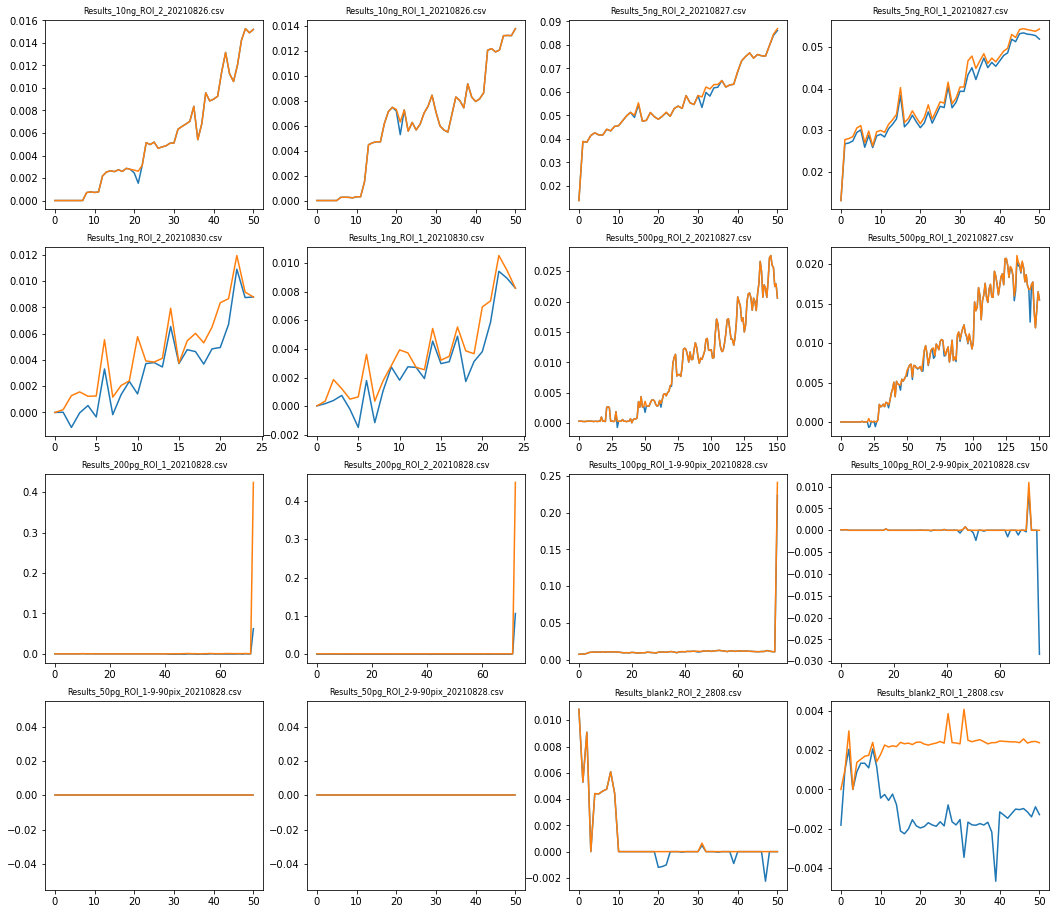

In [20]:
#Raw SIGNAL 
plt.figure(figsize=(18,16))

for i in range(len(data)): 
    df = data[i]
    plt.subplot(4,4,i+1)
    plt.plot(df.loc[:,df.columns[1]])
    #plt.legend(df.columns[1])

    plt.plot(df.loc[:,df.columns[2]])
    #plt.legend(df.columns[2])

    plt.title(df.columns[0],fontsize = 8)
plt.show()

## Mean between ROI

In [23]:
#Mean data between ROI1 and ROI2
d10ng = mean_std(d10ng_R1,d10ng_R2);
d5ng = mean_std(d5ng_R1,d5ng_R2);
d1ng = mean_std(d1ng_R1,d1ng_R2);
d500pg = mean_std(d500pg_R1,d500pg_R2);
d200pg = mean_std(d200pg_R1,d200pg_R2);
d100pg = mean_std(d100pg_R1,d100pg_R2);
d50pg = mean_std(d50pg_R1,d50pg_R2);
blank = mean_std(dblank_R1,dblank_R2);

#data_mean = []
#for i in range(len(data)):
#    data_mean=

data_mean = [d10ng, d5ng, d1ng, d500pg, d200pg, d100pg, d50pg, blank]

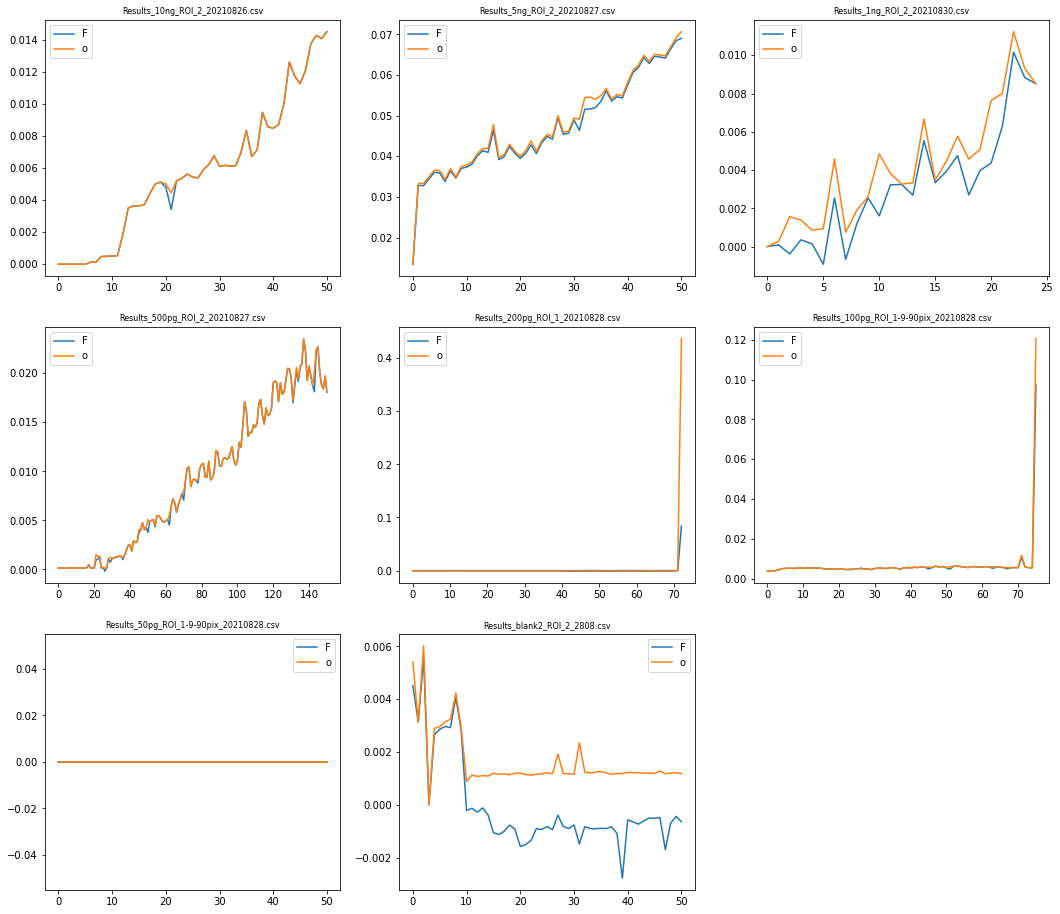

In [24]:
#Plot meaned data
plt.figure(figsize=(18,16))
for i in range(len(data_mean)): 
    df = data_mean[i]
    plt.subplot(3,3,i+1)
    plt.plot(df.loc[:,df.columns[1]])
    plt.legend(df.columns[1])

    plt.plot(df.loc[:,df.columns[2]])
    plt.legend(df.columns[2])

    plt.title(df.columns[0],fontsize = 8)
plt.show()

## Compute Moving Average

In [25]:
MA10ng = pd.DataFrame(d10ng.iloc[:,1:4].rolling(window=3).mean())
MA5ng = pd.DataFrame(d5ng.iloc[:,1:4].rolling(window=3).mean())
MA1ng = pd.DataFrame(d1ng.iloc[:,1:4].rolling(window=3).mean())
MA500pg = pd.DataFrame(d500pg.iloc[:,1:4].rolling(window=3).mean())
MA200pg = pd.DataFrame(d200pg.iloc[:,1:4].rolling(window=3).mean())
MA100pg = pd.DataFrame(d100pg.iloc[:,1:4].rolling(window=3).mean())
MA50pg = pd.DataFrame(d50pg.iloc[:,1:4].rolling(window=3).mean())
MAblank = pd.DataFrame(blank.iloc[:,1:4].rolling(window=3).mean())

MA_data = [MA10ng, MA5ng, MA1ng, MA500pg, MA200pg, MA100pg, MA50pg, MAblank]
MA_data_titles = ['MA10ng', 'MA5ng', 'MA1ng', 'MA500pg', 'MA200pg', 'MA100pg', 'MA50pg', 'MAblank']

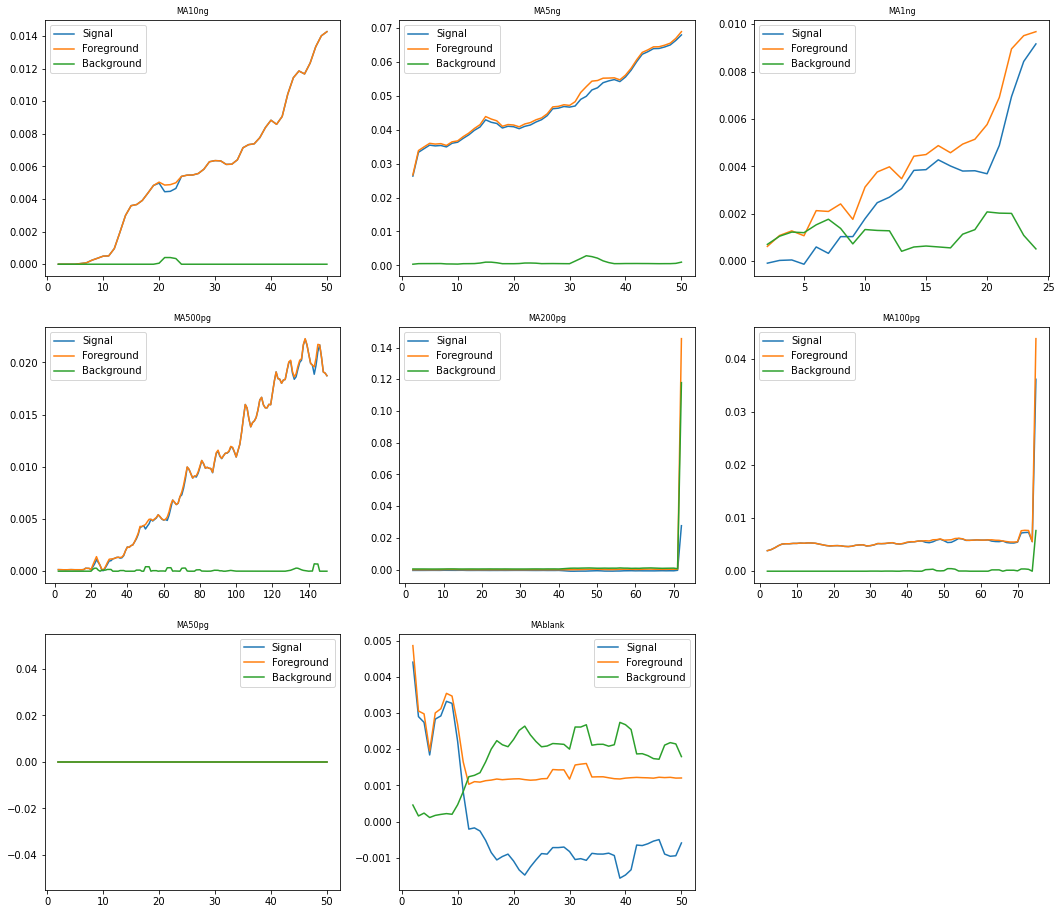

In [26]:
#Plot meaned data
plt.figure(figsize=(18,16))
for i in range(len(MA_data)): 
    df = MA_data[i]
    plt.subplot(3,3,i+1)
    plt.plot(df.loc[:,df.columns[0]])

    plt.plot(df.loc[:,df.columns[1]])
    
    plt.plot(df.loc[:,df.columns[2]])
    plt.legend(['Signal','Foreground', 'Background'])

    plt.title(MA_data_titles[i],fontsize = 8)
plt.show()

## Remove Outliers

In [27]:
MA200pg.drop(index=MA200pg.index[-1], axis=0, inplace=True)
MA100pg.drop(index=MA100pg.index[-1], axis=0, inplace=True)
MA_data = [MA10ng, MA5ng, MA1ng, MA500pg, MA200pg, MA100pg, MA50pg, MAblank]

MA200pg

,Signal,Foreground,Background
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,-0.000457,0.000000,0.000457
3,-0.000443,0.000000,0.000443
4,-0.000448,0.000000,0.000448
...,...,...,...
67,-0.000642,0.000229,0.000871
68,-0.000688,0.000231,0.000919
69,-0.000659,0.000294,0.000953
70,-0.000687,0.000301,0.000987


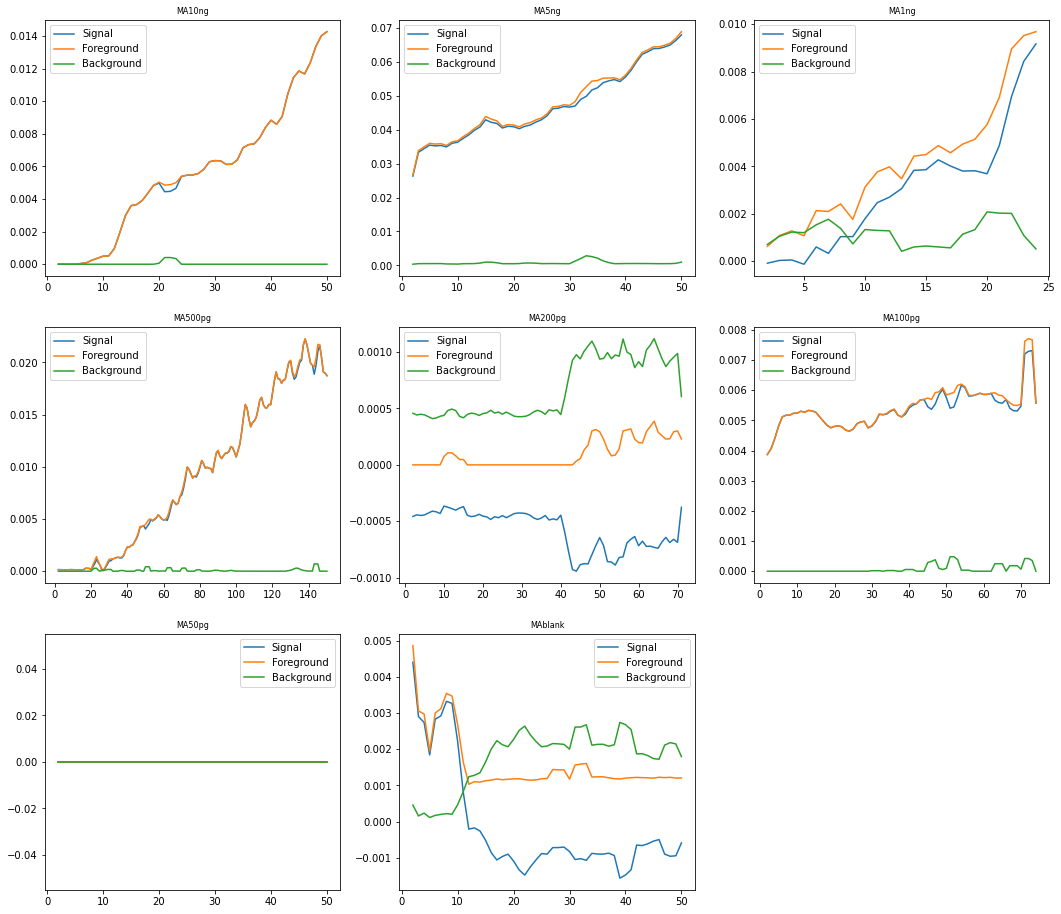

In [28]:
#Plot meaned data
plt.figure(figsize=(18,16))
for i in range(len(MA_data)): 
    df = MA_data[i]
    plt.subplot(3,3,i+1)
    #plot signal
    plt.plot(df.loc[:,df.columns[0]])
    #plot foreground
    plt.plot(df.loc[:,df.columns[1]])
    #plot background
    plt.plot(df.loc[:,df.columns[2]])
    plt.legend(['Signal','Foreground', 'Background'])

    plt.title(MA_data_titles[i],fontsize = 8)
plt.show()

In [29]:
from scipy.stats import linregress

def linreg(df):
    df.dropna(inplace=True)
    slope, intercept, r, p, stderr = linregress(np.array(df.index), df.loc[:,df.columns[0]])
    return slope, intercept, stderr

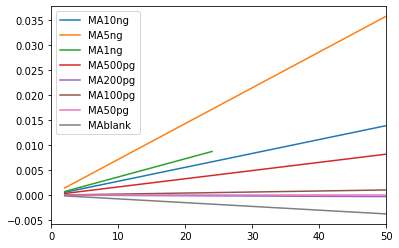

In [30]:
total_slopes = []
total_inter = []
total_std = []
plt.figure()

for d in MA_data:
    slope, inter, std = linreg(d)
    total_slopes.append(slope)
    total_inter.append(inter)
    total_std.append(std)
    x = np.array(d.index)
    y = slope*x#+inter
    plt.plot(x,y)
    plt.legend(MA_data_titles)
    plt.xlim(0,50)



In [31]:
for i in range(len(MA_data_titles)): print("{} :  slope = {} ".format(MA_data_titles[i],total_slopes[i]))

MA10ng :  slope = 0.00027747480939529286 
MA5ng :  slope = 0.0007145715326629337 
MA1ng :  slope = 0.0003632983022830469 
MA500pg :  slope = 0.000163534686198682 
MA200pg :  slope = -5.978373437513608e-06 
MA100pg :  slope = 2.0671983451513374e-05 
MA50pg :  slope = 0.0 
MAblank :  slope = -7.506198508350311e-05 


Text(0, 0.5, 'total_slopes')

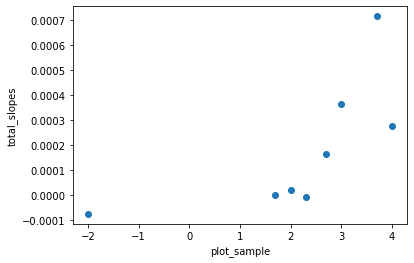

In [32]:
from math import log
c_sample=[10000,5000,1000,500,200,100,50,0.01]

plot_sample=[log(y,10) for y in c_sample]
plt.scatter(plot_sample, total_slopes)
plt.xlabel('plot_sample')
plt.ylabel('total_slopes')

[10000, 500, 200, 100, 50, 0.01]


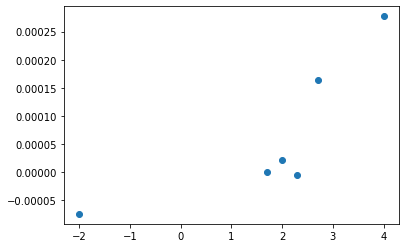

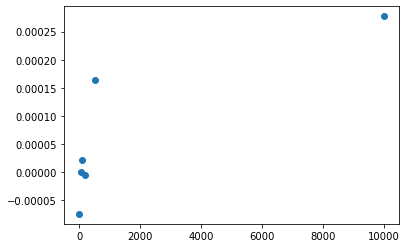

In [33]:
from math import log
y_good = [c_sample[0]]+c_sample[3:]
print(y_good)
plot_sample=[log(y,10) for y in y_good]
slop_good=[total_slopes[0]]+total_slopes[3:]   #TODO: ??????? WHAT'S THIS?
plt.figure()
plt.scatter(plot_sample,slop_good)
plt.figure()
plt.scatter(y_good,slop_good)

In [45]:
print(slop_good)
print(plot_sample)

X = total_slopes
print(X)

[0.00027747480939529286, 0.000163534686198682, -5.978373437513608e-06, 2.0671983451513374e-05, 0.0, -7.506198508350311e-05]
[4.0, 2.6989700043360183, 2.301029995663981, 2.0, 1.6989700043360185, -1.9999999999999996]
[0.00027747480939529286, 0.0007145715326629337, 0.0003632983022830469, 0.000163534686198682, -5.978373437513608e-06, 2.0671983451513374e-05, 0.0, -7.506198508350311e-05]


<ipython-input-59-1f7e69665799>:7: RuntimeWarning: overflow encountered in exp
  y = 1/(1+np.exp((x-h)/slope))*a+c


sigmoid params:  [-6.66505012e-04  5.08087529e+02  3.52361469e+02  4.96023387e-04]
linear params:  [4.09807698e-08 9.59980737e-05]


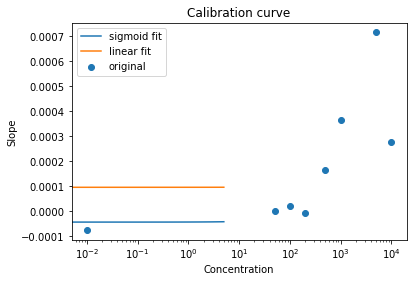

In [59]:
from scipy.optimize import curve_fit

xdata = np.array(c_sample)
ydata = np.array(total_slopes)

def sigmoid (x, a, h, slope, c):
    y = 1/(1+np.exp((x-h)/slope))*a+c
    #y = 1 / (1 + np.exp(-b*(x-a)))
    #    sig = np.exp(-np.logaddexp(0,-t))
    return y

def linear(x, a, b):
    return a*x + b


# Fits the function sigmoid with the x and y data
#   Note, we are using the cumulative sum of your beta distribution!


p, _ = curve_fit(sigmoid, xdata, ydata, maxfev=10000)
p_linear, _ = curve_fit(linear, xdata, ydata, maxfev = 10000)

x = np.linspace(-7,5,50)
y = sigmoid(x, *p)
y_linear = linear(x, *p_linear)

# Plots the data
plt.scatter(xdata, ydata, label='original')
plt.plot(x, y, label='sigmoid fit')
plt.xscale('log')
plt.plot(x, y_linear, label='linear fit')
plt.xlabel('Concentration')
plt.ylabel('Slope')
plt.title('Calibration curve')
plt.legend()
#plt.xlim([-0.0001,0.0007])

print('sigmoid params: ', p)
print('linear params: ', p_linear)

In [56]:
print(xdata)
print(ydata)

[5.e+03 1.e+03 5.e+02 2.e+02 1.e+02 5.e+01 1.e-02]
[ 7.14571533e-04  3.63298302e-04  1.63534686e-04 -5.97837344e-06
  2.06719835e-05  0.00000000e+00 -7.50619851e-05]


In [37]:
from sklearn.linear_model import LogisticRegression
X = np.asarray(plot_sample)
print(X.shape)
X = X.reshape(-1,1)

print(X.shape)
logisticRegr = LogisticRegression()

clf = logisticRegr.fit(X, slop_good)
clf.predict(X)
print(clf.score(plot_sample, slop_good))

(6,)
(6, 1)


ValueError: Unknown label type: 'continuous'